In [102]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import unidecode
import numpy as np
import matplotlib.pyplot as plt

In [103]:
df = pd.read_csv('datasus.csv')

C:\Users\rozan\AppData\Local\Temp\ipykernel_22480\2335452207.py:1: DtypeWarning: Columns (62) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('datasus.csv')


In [104]:
pd.set_option('display.max_rows', None)


In [105]:
pd.set_option('display.max_columns', None)


In [106]:
df .head()

,sintomas,profissionalSaude,racaCor,outrosSintomas,outrasCondicoes,profissionalSeguranca,cbo,condicoes,sexo,estado,estadoIBGE,municipio,municipioIBGE,origem,estadoNotificacao,municipioNotificacao,municipioNotificacaoIBGE,evolucaoCaso,classificacaoFinal,codigoEstrategiaCovid,codigoBuscaAtivaAssintomatico,outroBuscaAtivaAssintomatico,codigoTriagemPopulacaoEspecifica,outroTriagemPopulacaoEspecifica,codigoLocalRealizacaoTestagem,outroLocalRealizacaoTestagem,codigoRecebeuVacina,codigoLaboratorioPrimeiraDose,codigoLaboratorioSegundaDose,lotePrimeiraDose,loteSegundaDose,codigoContemComunidadeTradicional,source_id,excluido,validado,codigoDosesVacina,estadoNotificacaoIBGE,totalTestesRealizados,dataNotificacao,dataInicioSintomas,dataEncerramento,dataPrimeiraDose,dataSegundaDose,codigoEstadoTeste1,codigoTipoTeste1,codigoFabricanteTeste1,codigoResultadoTeste1,codigoEstadoTeste2,codigoTipoTeste2,codigoFabricanteTeste2,codigoResultadoTeste2,codigoEstadoTeste3,codigoTipoTeste3,codigoFabricanteTeste3,codigoResultadoTeste3,codigoEstadoTeste4,codigoTipoTeste4,codigoFabricanteTeste4,codigoResultadoTeste4,dataColetaTeste1,dataColetaTeste2,dataColetaTeste3,dataColetaTeste4,idade
0,Assintomático,Não,Amarela,NaN,NaN,Não,NaN,NaN,Feminino,Pará,PA,Tucuruí,1508100.0,parse-cloud,Pará,Tucuruí,1508100.0,Cura,Síndrome Gripal Não Especificada,1.0,NaN,NaN,NaN,NaN,1.0,NaN,1.0,ASTRAZENECA,ASTRAZENECA/FIOCRUZ,CTMAV501,214VCD076W,2.0,IPFAhfF7DY,FALSO,FALSO,"2,3,2001",PA,1,09/07/2022,NaN,2024-04-11,2021-04-08,2021-07-08,3.0,3.0,715.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,09/07/2022,NaN,NaN,NaN,NaN
1,Assintomático,Não,Parda,NaN,NaN,Não,NaN,NaN,Masculino,Pará,PA,Tucuruí,1508100.0,parse-cloud,Pará,Tucuruí,1508100.0,Cura,Síndrome Gripal Não Especificada,1.0,NaN,NaN,NaN,NaN,1.0,NaN,1.0,ASTRAZENECA/FIOCRUZ,ASTRAZENECA,215VCD144W,210185,2.0,SSB7t5jM3w,FALSO,FALSO,"3,1,2002",PA,1,31/08/2022,NaN,2024-03-27,2021-06-21,2021-09-21,3.0,3.0,715.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31/08/2022,NaN,NaN,NaN,NaN
2,"Coriza, Tosse, Dor de Garganta, Dor de Cabeça",Não,Parda,NaN,NaN,Não,NaN,NaN,Feminino,Pará,PA,Tucuruí,1508100.0,parse-cloud,Pará,Tucuruí,1508100.0,Em tratamento domiciliar,Confirmado Laboratorial,1.0,NaN,NaN,NaN,NaN,1.0,NaN,1.0,SINOVAC/BUTANTAN,SINOVAC/BUTANTAN,210327,210400,2.0,TlDExUobdp,FALSO,FALSO,"1,2,2003",PA,1,18/01/2022,2022-01-15,2024-05-29,2021-08-14,2021-09-14,3.0,3.0,715.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18/01/2022,NaN,NaN,NaN,29.0
3,"Dor de Cabeça, Tosse, Febre, Outros",Não,Parda,"MIALGIA, ARTRALGIA",NaN,Não,NaN,NaN,Feminino,Pará,PA,Tucuruí,1508100.0,parse-cloud,Pará,Tucuruí,1508100.0,Cura,Síndrome Gripal Não Especificada,1.0,NaN,NaN,NaN,NaN,1.0,NaN,1.0,SINOVAC/BUTANTAN,SINOVAC/BUTANTAN,210365,210400,2.0,k851hxFVJJ,FALSO,FALSO,"2,1",PA,1,12/07/2022,2022-07-10,2024-04-24,2021-08-17,2021-09-14,3.0,3.0,792.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12/07/2022,NaN,NaN,NaN,24.0
4,"Tosse, Dor de Cabeça",Não,Branca,NaN,NaN,Não,NaN,NaN,Feminino,Pará,PA,Tucuruí,1508100.0,parse-cloud,Pará,Tucuruí,1508100.0,Cura,Síndrome Gripal Não Especificada,1.0,NaN,NaN,NaN,NaN,1.0,NaN,1.0,ASTRAZENECA/FIOCRUZ,ASTRAZENECA,213VCD008VA,210198,2.0,kqGnR4HvID,FALSO,FALSO,"3,1,2002",PA,1,30/01/2022,2022-01-29,2024-05-28,2021-06-09,2021-09-09,3.0,3.0,715.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30/01/2022,NaN,NaN,NaN,28.0


In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148741 entries, 0 to 148740
Data columns (total 64 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   sintomas                           148737 non-null  object 
 1   profissionalSaude                  148737 non-null  object 
 2   racaCor                            148633 non-null  object 
 3   outrosSintomas                     15479 non-null   object 
 4   outrasCondicoes                    4471 non-null    object 
 5   profissionalSeguranca              148566 non-null  object 
 6   cbo                                9123 non-null    object 
 7   condicoes                          15168 non-null   object 
 8   sexo                               148741 non-null  object 
 9   estado                             148741 non-null  object 
 10  estadoIBGE                         143029 non-null  object 
 11  municipio                          1487

In [108]:
# Quantidade de nulos por coluna
df.isnull().sum()

# Porcentagem de nulos por coluna
#(df.isnull().mean() * 100).round(2)


sintomas                                  4
profissionalSaude                         4
racaCor                                 108
outrosSintomas                       133262
outrasCondicoes                      144270
profissionalSeguranca                   175
cbo                                  139618
condicoes                            133573
sexo                                      0
estado                                    0
estadoIBGE                             5712
municipio                                 0
municipioIBGE                          5843
origem                                    0
estadoNotificacao                         0
municipioNotificacao                    138
municipioNotificacaoIBGE               8236
evolucaoCaso                          23210
classificacaoFinal                    23929
codigoEstrategiaCovid                  7653
codigoBuscaAtivaAssintomatico        131939
outroBuscaAtivaAssintomatico         140135
codigoTriagemPopulacaoEspecifica

In [109]:
duplicadas = df[df.duplicated()]
duplicadas


,sintomas,profissionalSaude,racaCor,outrosSintomas,outrasCondicoes,profissionalSeguranca,cbo,condicoes,sexo,estado,estadoIBGE,municipio,municipioIBGE,origem,estadoNotificacao,municipioNotificacao,municipioNotificacaoIBGE,evolucaoCaso,classificacaoFinal,codigoEstrategiaCovid,codigoBuscaAtivaAssintomatico,outroBuscaAtivaAssintomatico,codigoTriagemPopulacaoEspecifica,outroTriagemPopulacaoEspecifica,codigoLocalRealizacaoTestagem,outroLocalRealizacaoTestagem,codigoRecebeuVacina,codigoLaboratorioPrimeiraDose,codigoLaboratorioSegundaDose,lotePrimeiraDose,loteSegundaDose,codigoContemComunidadeTradicional,source_id,excluido,validado,codigoDosesVacina,estadoNotificacaoIBGE,totalTestesRealizados,dataNotificacao,dataInicioSintomas,dataEncerramento,dataPrimeiraDose,dataSegundaDose,codigoEstadoTeste1,codigoTipoTeste1,codigoFabricanteTeste1,codigoResultadoTeste1,codigoEstadoTeste2,codigoTipoTeste2,codigoFabricanteTeste2,codigoResultadoTeste2,codigoEstadoTeste3,codigoTipoTeste3,codigoFabricanteTeste3,codigoResultadoTeste3,codigoEstadoTeste4,codigoTipoTeste4,codigoFabricanteTeste4,codigoResultadoTeste4,dataColetaTeste1,dataColetaTeste2,dataColetaTeste3,dataColetaTeste4,idade


In [110]:
colunas_data = ['dataNotificacao', 'dataInicioSintomas', 'dataEncerramento', 
                    'dataPrimeiraDose', 'dataSegundaDose']
    
for col in colunas_data:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], errors='coerce', dayfirst=True)

C:\Users\rozan\AppData\Local\Temp\ipykernel_22480\2052561762.py:6: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df[col] = pd.to_datetime(df[col], errors='coerce', dayfirst=True)


In [111]:
df.replace(['None', 'null', 'Nan', ''], np.nan, inplace=True)

In [112]:
cols_texto = ['sintomas', 'racaCor', 'sexo', 'estado', 'municipio']
for col in cols_texto:
        if col in df.columns:
            df[col] = df[col].astype(str).str.strip().str.upper()
            # Transformar 'NAN' string de volta para nulo real após conversão
            df[col].replace('NAN', np.nan, inplace=True)

C:\Users\rozan\AppData\Local\Temp\ipykernel_22480\93961824.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].replace('NAN', np.nan, inplace=True)
C:\Users\rozan\AppData\Local\Temp\ipykernel_22480\93961824.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, wh

In [113]:
mapa_bool = {
    'FALSO': False, 'NAO': False, 'NÃO': False, 'FALSE': False,
    'VERDADEIRO': True, 'SIM': True, 'TRUE': True,
    

    'NÃO INFORMADO': np.nan, 'NAO INFORMADO': np.nan, 'INDEFINIDO': np.nan,
    'NAN': np.nan 
}

cols_bool = ['profissionalSaude', 'profissionalSeguranca', 'excluido']

for col in cols_bool:
    if col in df.columns:
        df[col] = df[col].map(mapa_bool)

In [114]:
if 'idade' in df.columns:
        df['idade'] = pd.to_numeric(df['idade'], errors='coerce')
        df = df[(df['idade'] >= 0) & (df['idade'] <= 120)]

In [115]:

cols_categoricas = df.select_dtypes(include=['object', 'category']).columns

df[cols_categoricas] = df[cols_categoricas].fillna("não informado")




C:\Users\rozan\AppData\Local\Temp\ipykernel_22480\3058429130.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[cols_categoricas] = df[cols_categoricas].fillna("não informado")


In [116]:
df['idade'] = df['idade'].fillna(df['idade'].mean())


In [117]:
df.isnull().mean().sort_values(ascending=False)

codigoFabricanteTeste4               0.999250
codigoResultadoTeste4                0.998812
codigoEstadoTeste4                   0.998729
codigoTipoTeste4                     0.998729
codigoFabricanteTeste3               0.997404
codigoResultadoTeste3                0.995886
codigoTipoTeste3                     0.994250
codigoEstadoTeste3                   0.994250
codigoTriagemPopulacaoEspecifica     0.978655
codigoFabricanteTeste2               0.966589
codigoResultadoTeste2                0.950847
codigoEstadoTeste2                   0.916403
codigoTipoTeste2                     0.916403
codigoBuscaAtivaAssintomatico        0.903011
dataSegundaDose                      0.804880
dataPrimeiraDose                     0.773845
dataEncerramento                     0.664552
dataInicioSintomas                   0.378183
codigoFabricanteTeste1               0.261660
codigoRecebeuVacina                  0.191784
codigoResultadoTeste1                0.143491
codigoEstadoTeste1                

Ha uma grande quantidade de nulos não ajustaveis tentei fazer o maximo de ajuste possiveis mantendo a integridade do dataset

conclui a limpeza deixando nulos apenas nas colunas referentes a codigos especificos ou seja não tem como subisituilos por metodos pradrões além disso removia os outliers em idade

In [118]:


df.to_parquet("datasus_limpo.parquet", index=False)

(array([11418.,  5031.,  6072.,  8573., 14331., 12948., 15502., 13264.,
        13776.,  8479.]),
 array([ 0. ,  5.5, 11. , 16.5, 22. , 27.5, 33. , 38.5, 44. , 49.5, 55. ]),
 <BarContainer object of 10 artists>)

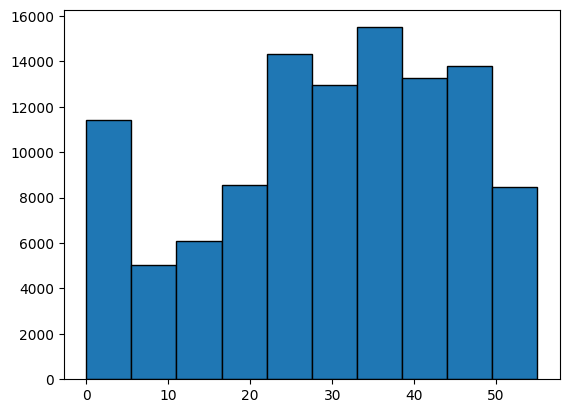

In [119]:
plt.hist(data=df,x='idade',edgecolor='Black')